Thanks to the authors of those those great kernels, which turned out to be very educational:  
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/mdhrumil/ames-housing-price-predictions  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard  
https://www.kaggle.com/johnwill225/extensive-exploratory-data-analysis  
https://www.kaggle.com/apapiu/regularized-linear-models/notebook

# Disclaimer   
To prevent data leakage issue and imitate more realistic scenario, all the model preperation will be performed only on the training set. However, better results could be achieved if all the available data was used during the data exploration and preprocessing. 

# The Data  
Ames Housing dataset from Kaggle:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  
Goal is to build a regression model to predict house prices.

# Start

In [1]:
# some basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignoring warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
target = pd.read_csv("data/sample_submission.csv")

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train = train.drop('Id',axis=1)
test = test.drop('Id',axis=1)

In [5]:
train.shape

(1460, 80)

In [6]:
test.shape

(1459, 79)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
pd.set_option('display.max_columns', 100)
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Distilling true numerical and categorical/discrete features:

Features initially set as numerical:

In [9]:
train.dtypes[train.dtypes != object].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Features initially set as categorical:

In [10]:
train.dtypes[train.dtypes == object].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Data frame containing only data types:

In [11]:
pd.set_option('display.max_columns', 100)
pd.DataFrame(train.dtypes).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


In [12]:
# numerical features
num_feats = train.drop(train[['MSSubClass','OverallQual','OverallCond','YrSold','MoSold',
                              'YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                              'BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','KitchenAbvGr']],
                       axis=1).dtypes[train.dtypes != object].index
num_feats

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [13]:
# categorical features
cat_feats = pd.concat([train[['MSSubClass','OverallQual','OverallCond','YrSold','MoSold',
                              'YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath',
                              'FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd',
                              'Fireplaces','GarageYrBlt','GarageCars','KitchenAbvGr']],
                       train[(train.dtypes[train.dtypes == object].index)]],axis=1).columns
cat_feats

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YrSold', 'MoSold',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'KitchenAbvGr', 'MSZoning', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

# Target variable:

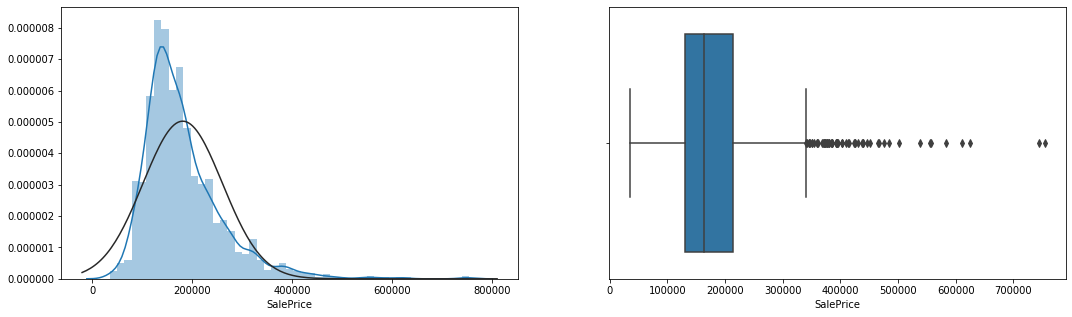

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [14]:
from scipy.stats import norm

f,ax = plt.subplots(1,2,figsize=(18,5))
sns.distplot(train['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(train['SalePrice'])
plt.show()

print('Skewness: {}'.format(train['SalePrice'].skew()))
print('Kurtosis: {}'.format(train['SalePrice'].kurt()))
print('\n')
print(train['SalePrice'].describe())

Target variable is skewed right. Also, there are many outliers for more expensive houses and maybe in some cases it would be more useful to model more 'average' house - therefore it's interesting to see how the distribution of the target variable would look like without the 1% of the most expensive houses:

In [15]:
len(train)*0.01  # returns how many observations make 1%

14.6

In [16]:
print('Top 1% most expensive houses:')
print(train.sort_values('SalePrice',ascending=False)['SalePrice'].iloc[:round(len(train)*0.01)])
print('\n')
print("Number of houses for the 99th percentile price-wise, that is with SalePrice no less than 446 261: %d" 
      %train.sort_values('SalePrice',ascending=False)['SalePrice'].iloc[:round(len(train)*0.01)].count())

Top 1% most expensive houses:
691     755000
1182    745000
1169    625000
898     611657
803     582933
1046    556581
440     555000
769     538000
178     501837
798     485000
185     475000
1373    466500
1243    465000
591     451950
527     446261
Name: SalePrice, dtype: int64


Number of houses for the 99th percentile price-wise, that is with SalePrice no less than 446 261: 15


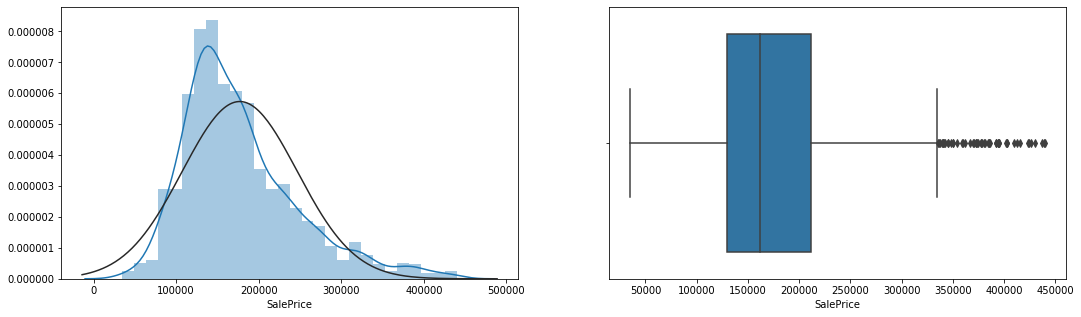

Skewness: 1.0949464064245202
Kurtosis: 1.2760398751868065


count      1445.000000
mean     177082.510035
std       69614.603756
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      440000.000000
Name: SalePrice, dtype: float64


In [17]:
bottom_99_percent = train.sort_values('SalePrice',ascending=False).iloc[round(len(train)*0.01):]

f,ax = plt.subplots(1,2,figsize=(18,5))
sns.distplot(bottom_99_percent['SalePrice'],fit=norm,ax=ax[0])
sns.boxplot(bottom_99_percent['SalePrice'])
plt.show()

print('Skewness: {}'.format(bottom_99_percent['SalePrice'].skew()))
print('Kurtosis: {}'.format(bottom_99_percent['SalePrice'].kurt()))
print('\n')
print(bottom_99_percent['SalePrice'].describe())

Still, skewness remains quite significant.

# Correlation

Note that Pandas *dataframe.corr()* inputs only numerical features and features encoded as *object* won't be taken into account.

(38.5, -0.5)

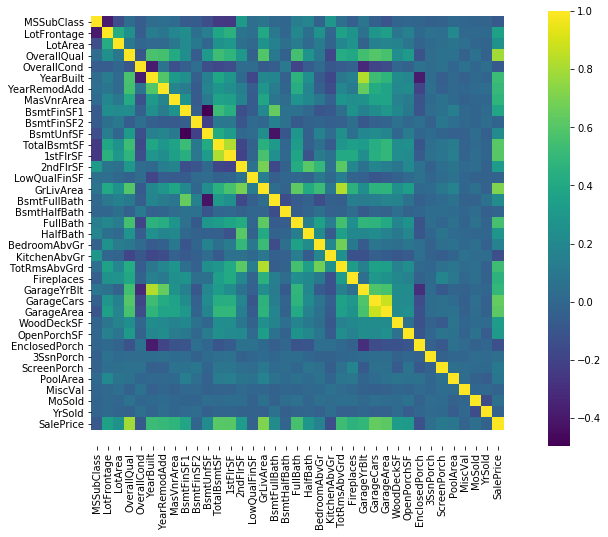

In [18]:
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(train.corr(), square=True,cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1.5, top - 0.5)

10 most positively correlated features (initially set as numerical):

In [19]:
train.corr()["SalePrice"][:-1].nlargest(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

10 most negatively correlated features (initially set as numerical):

In [20]:
train.corr()["SalePrice"].nsmallest(10)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
Name: SalePrice, dtype: float64

Correlation-wise ordered heatmap with less features:

(11.5, -0.5)

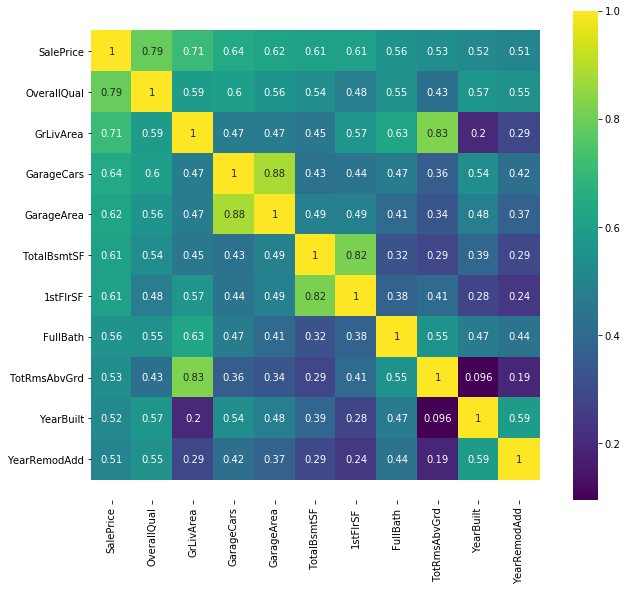

In [21]:
f, ax = plt.subplots(figsize=(12, 9))
cols = train.corr()["SalePrice"].nlargest(11).index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, square=True, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Pairplots of some most correlated features:

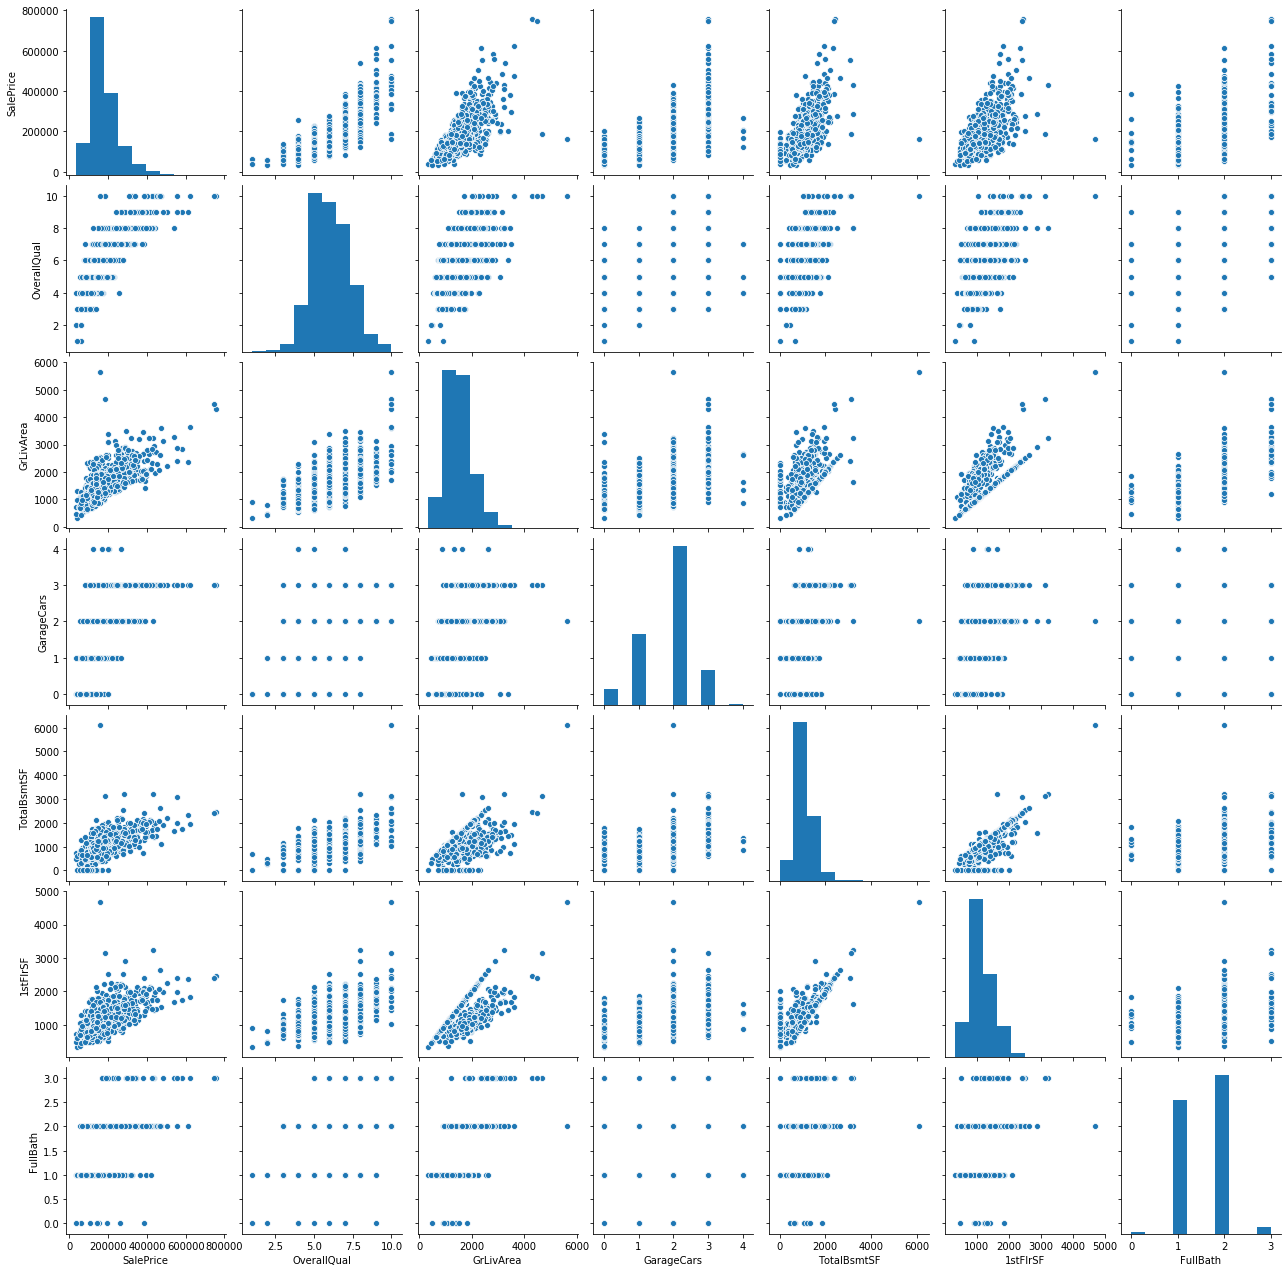

In [22]:
cols = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath']
sns.pairplot(train[cols])

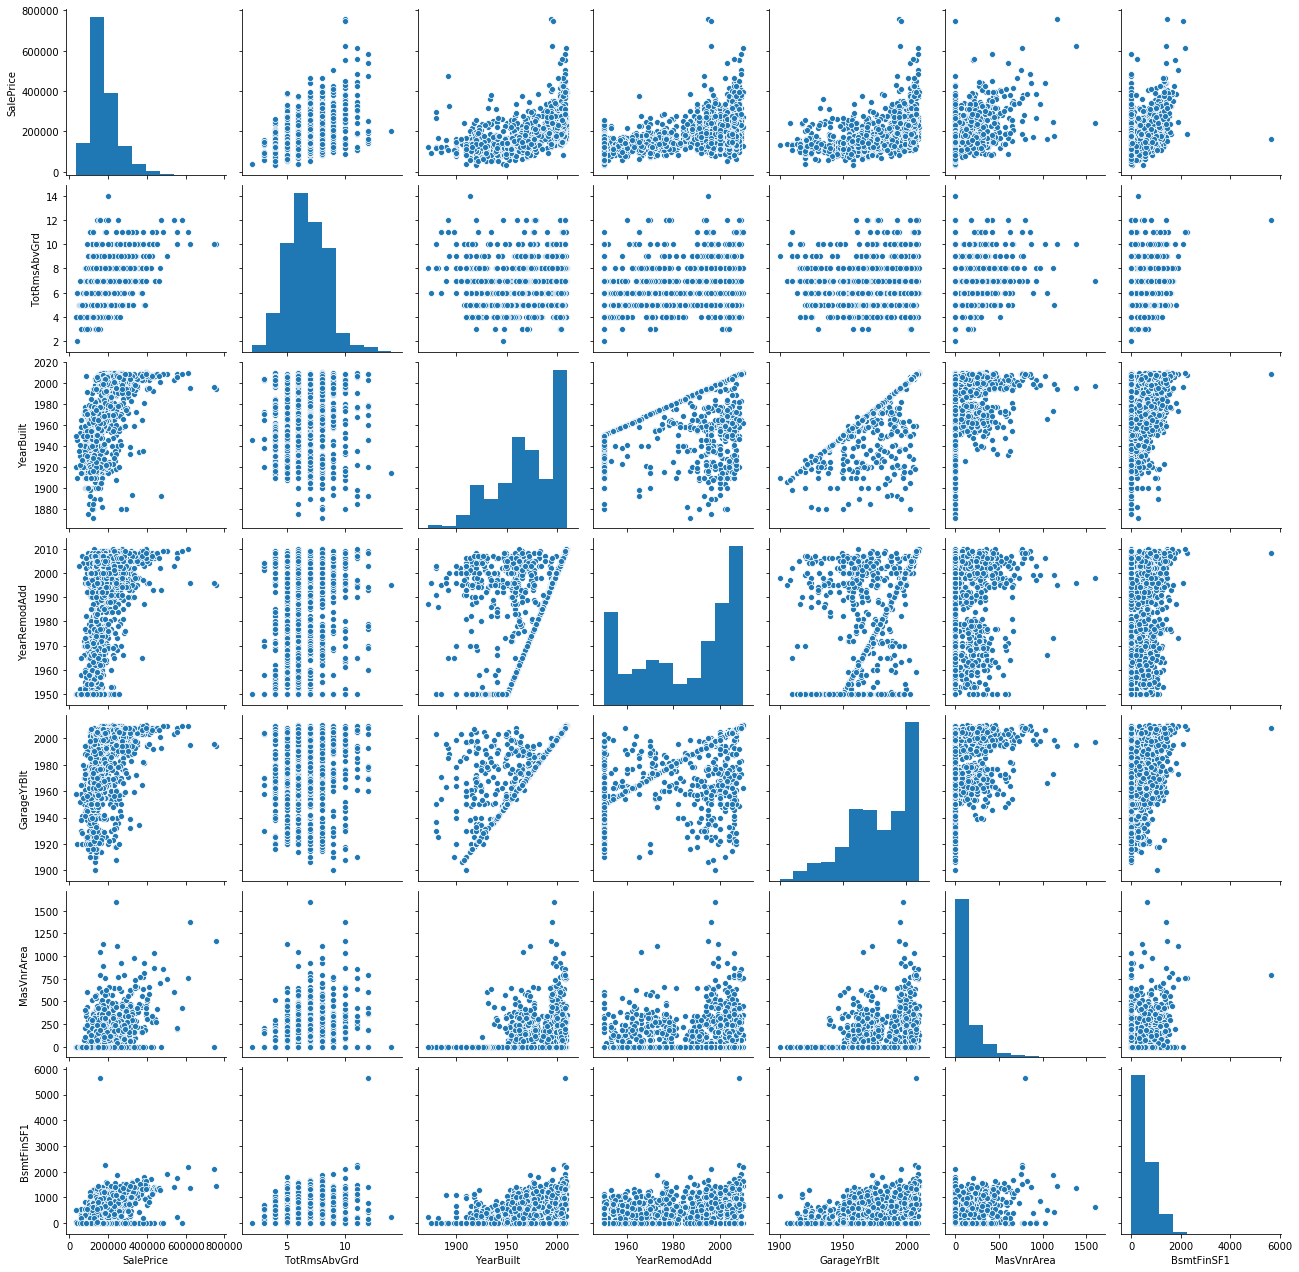

In [23]:
cols = ['SalePrice','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','BsmtFinSF1']
sns.pairplot(train[cols])

# Numerical features exploration

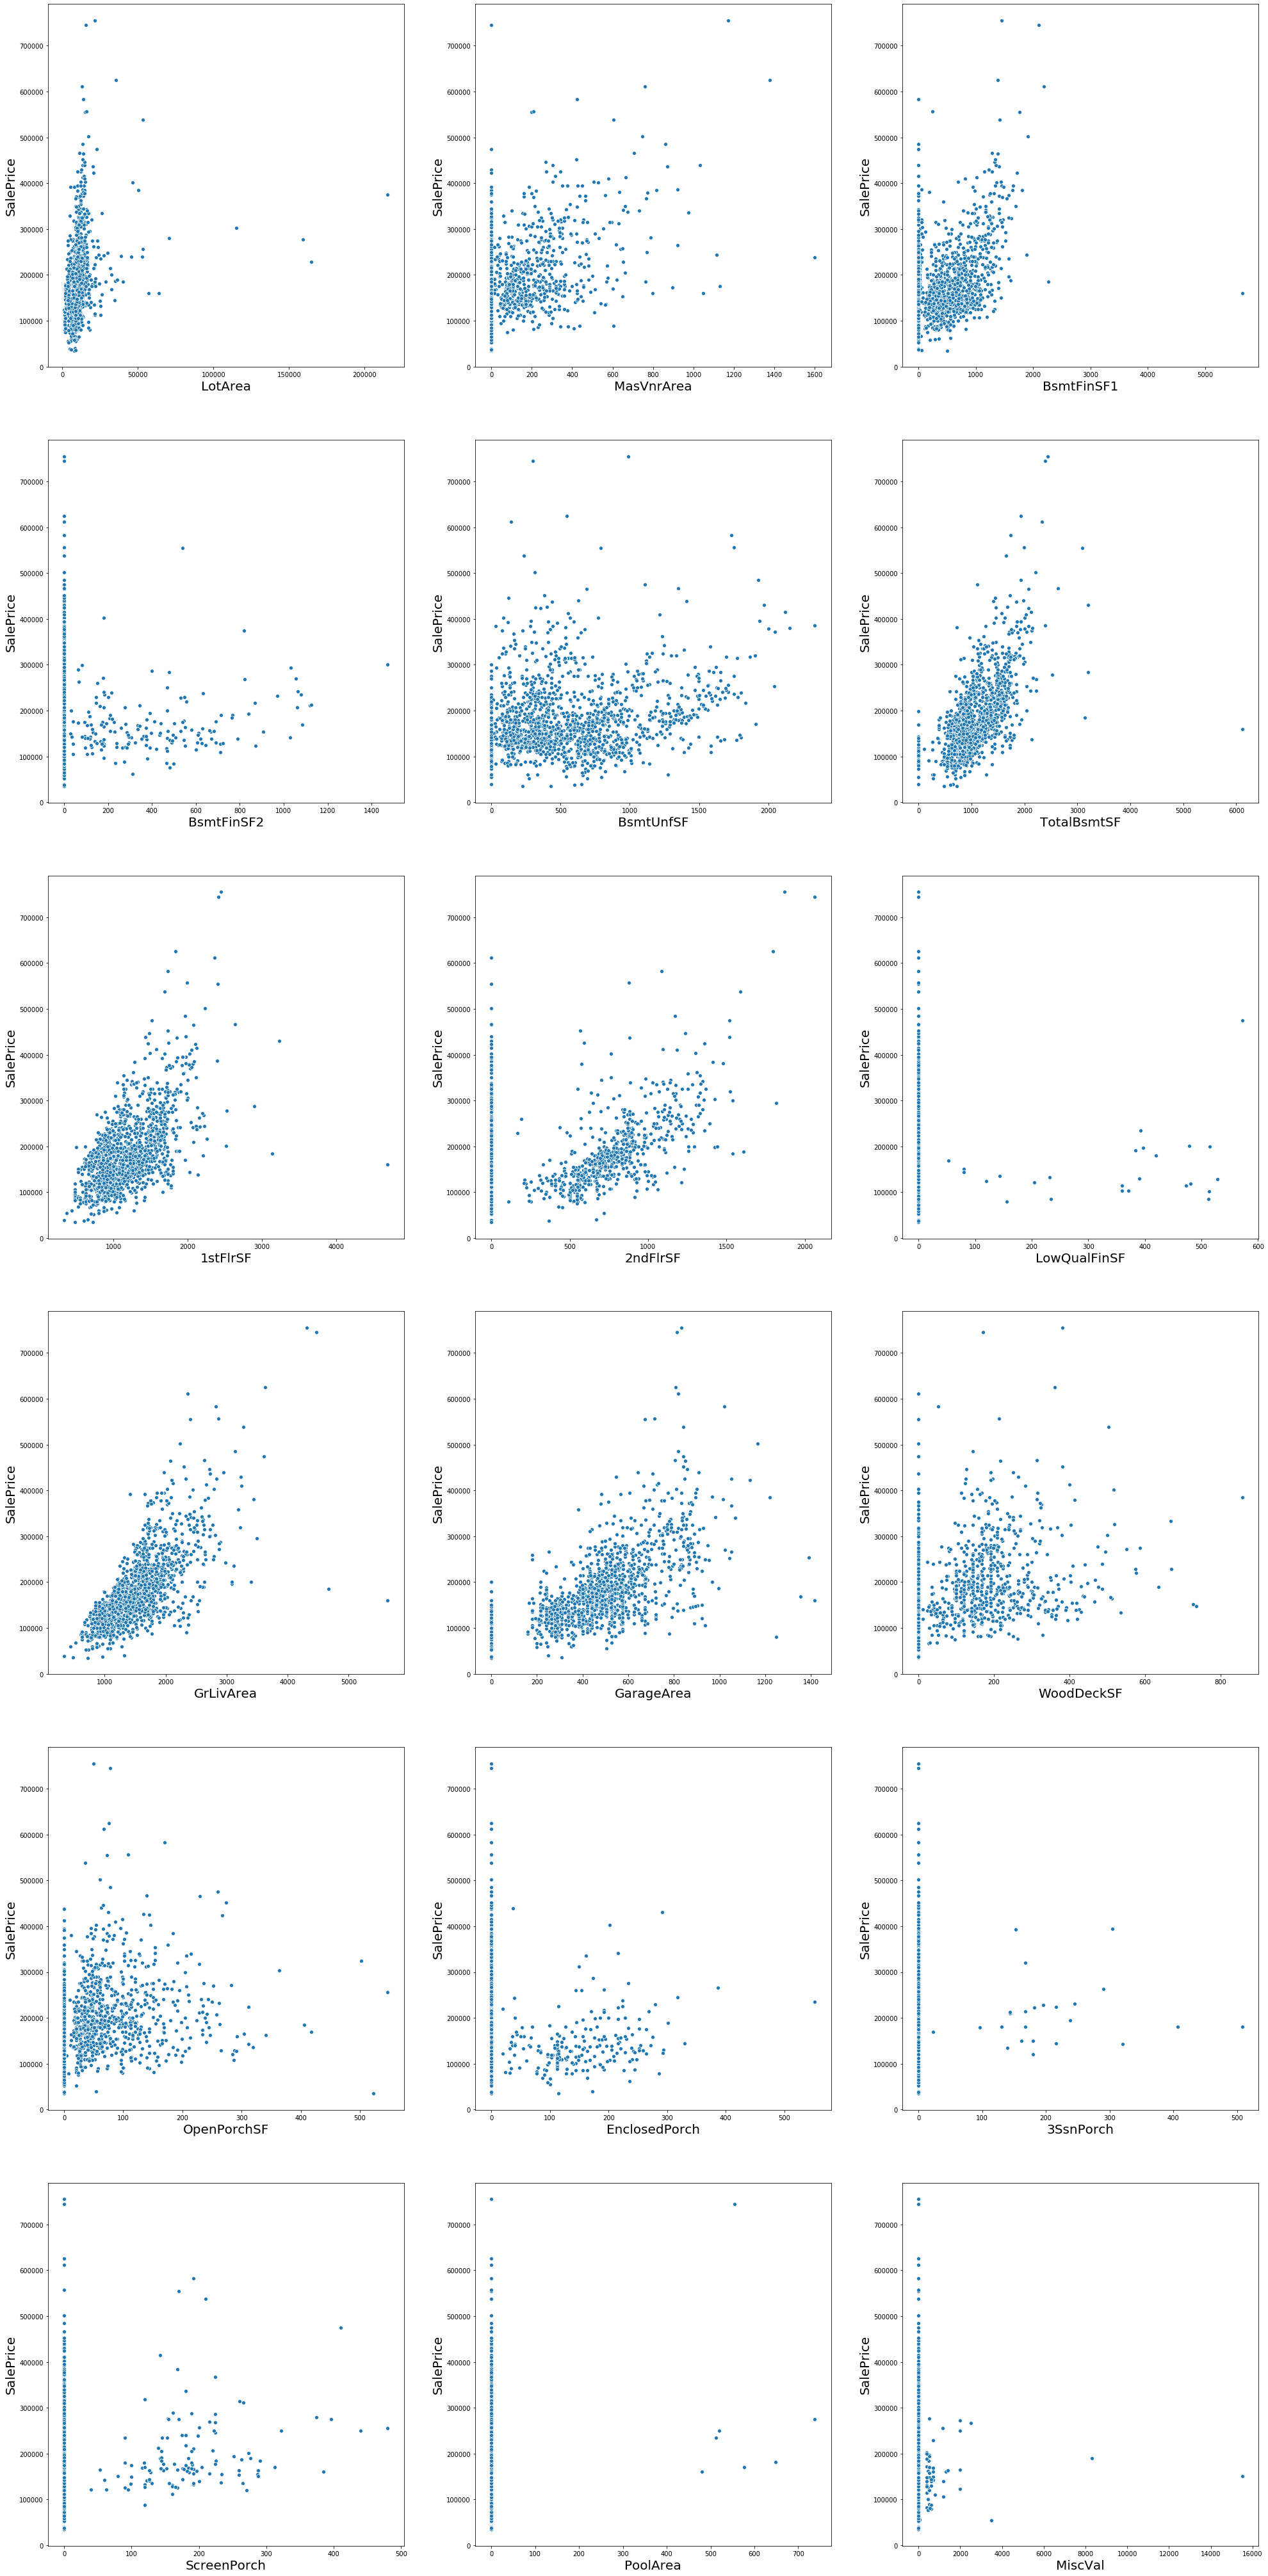

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(14, 100))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i in range(1,len(num_feats)-1):
    feat = num_feats[i]
    plt.subplot(len(num_feats), 3, i)
    sns.scatterplot(x=feat, y='SalePrice', data=train)
    plt.xlabel('{}'.format(feat), size=20)
    plt.ylabel('SalePrice', size=20)

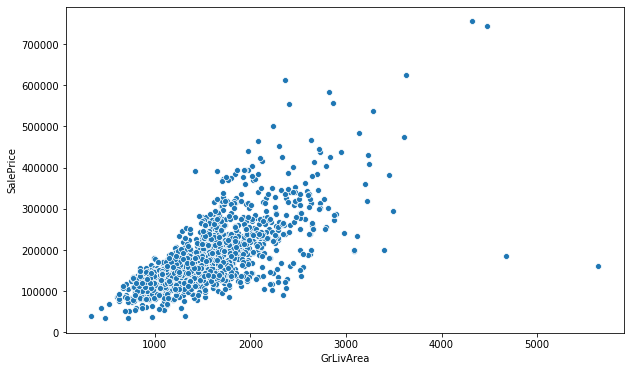

In [25]:
feat = 'GrLivArea'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Outliers:

In [26]:
train[(train['SalePrice']<300000) & (train['GrLivArea']>4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


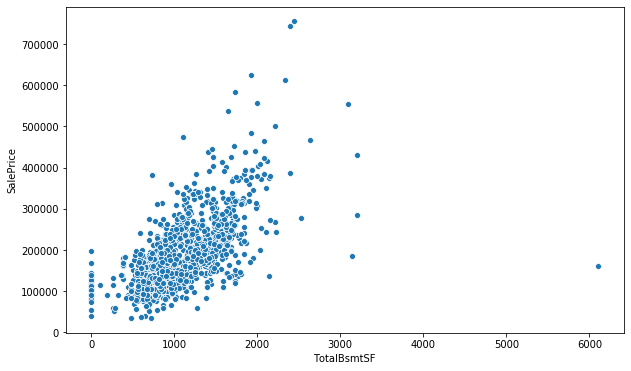

In [27]:
feat = 'TotalBsmtSF'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Outliers:

In [28]:
train[(train['SalePrice']<300000) & (train['TotalBsmtSF']>6000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Outliers:

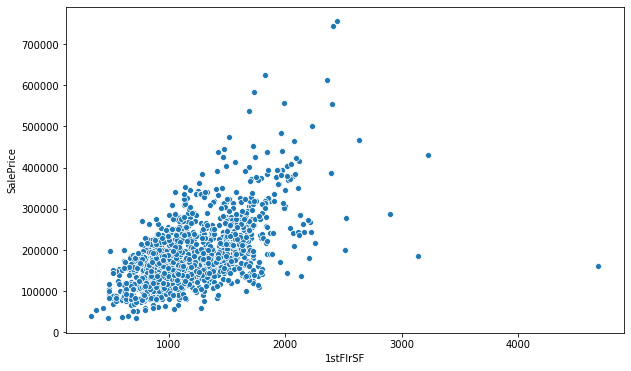

In [29]:
feat = '1stFlrSF'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Outliers:

In [30]:
train[(train['SalePrice']<200000) & (train['1stFlrSF']>4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


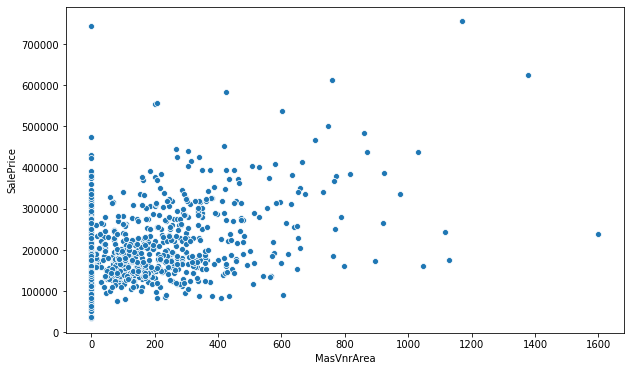

In [31]:
feat = 'MasVnrArea'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Outliers:

In [32]:
train[(train['SalePrice']<300000) & (train['MasVnrArea']>1500)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,TA,Detchd,1997.0,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


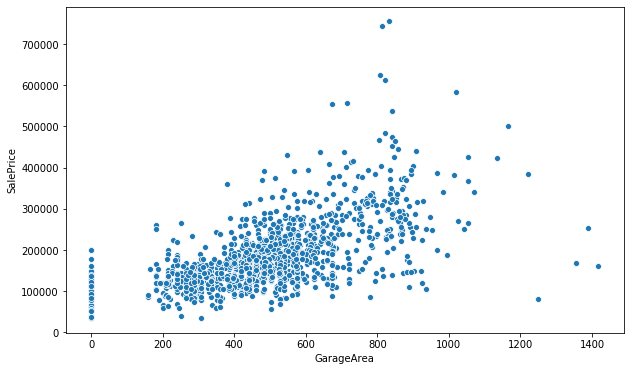

In [33]:
feat = 'GarageArea'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

In [34]:
train[(train['SalePrice']<300000) & (train['GarageArea']>1200)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,BrkFace,306.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,2042,2042,GasA,Ex,Y,SBrkr,2042,0,0,2042,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2009.0,RFn,3,1390,TA,TA,Y,0,90,0,0,0,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,2fmCon,1Story,4,4,1961,1975,Gable,CompShg,MetalSd,MetalSd,Stone,149.0,TA,Gd,CBlock,TA,TA,Av,BLQ,1159,Unf,0,90,1249,GasA,Ex,Y,SBrkr,1622,0,0,1622,1,0,1,0,3,1,TA,7,Typ,1,TA,2Types,1975.0,Fin,4,1356,TA,TA,Y,439,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


# Categorical/discrete features exploration

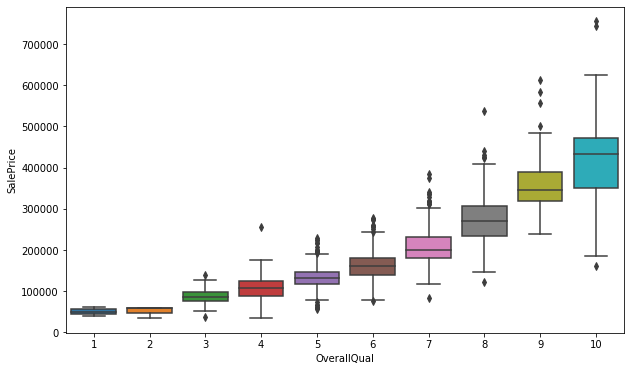

In [35]:
feat = 'OverallQual'
plt.figure(figsize=(10,6))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))

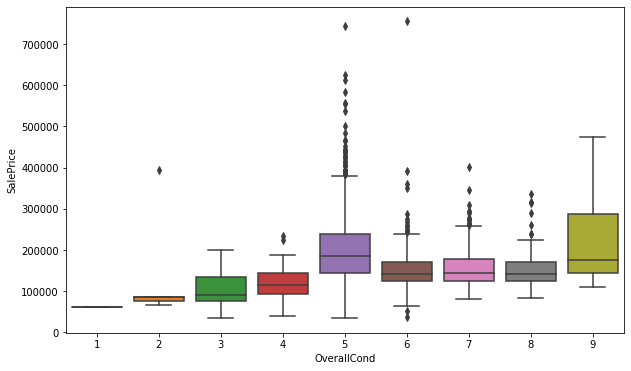

In [36]:
feat = 'OverallCond'
plt.figure(figsize=(10,6))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Many outliers for values from 5 to 8.

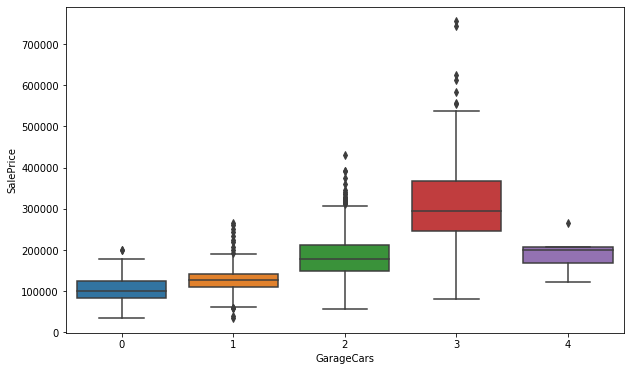

In [37]:
feat = 'GarageCars'
plt.figure(figsize=(10,6))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))

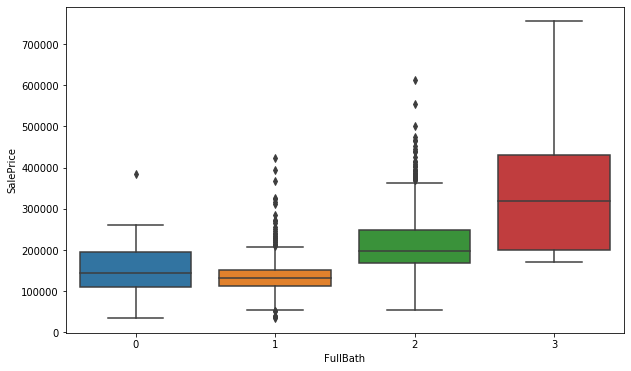

In [38]:
feat = 'FullBath'
plt.figure(figsize=(10,6))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))

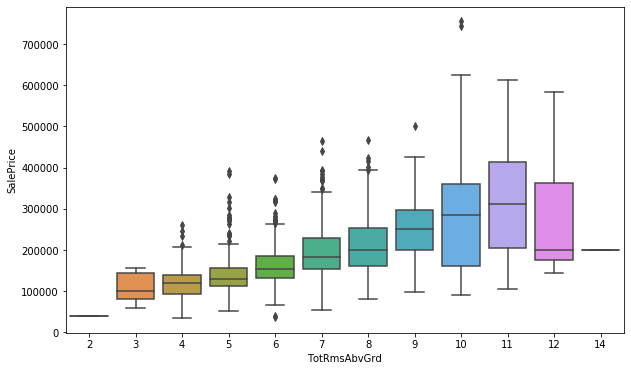

In [39]:
feat = 'TotRmsAbvGrd'
plt.figure(figsize=(10,6))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))

In [40]:
len(train[(train['TotRmsAbvGrd']<3) | (train['TotRmsAbvGrd']>12)])

2

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

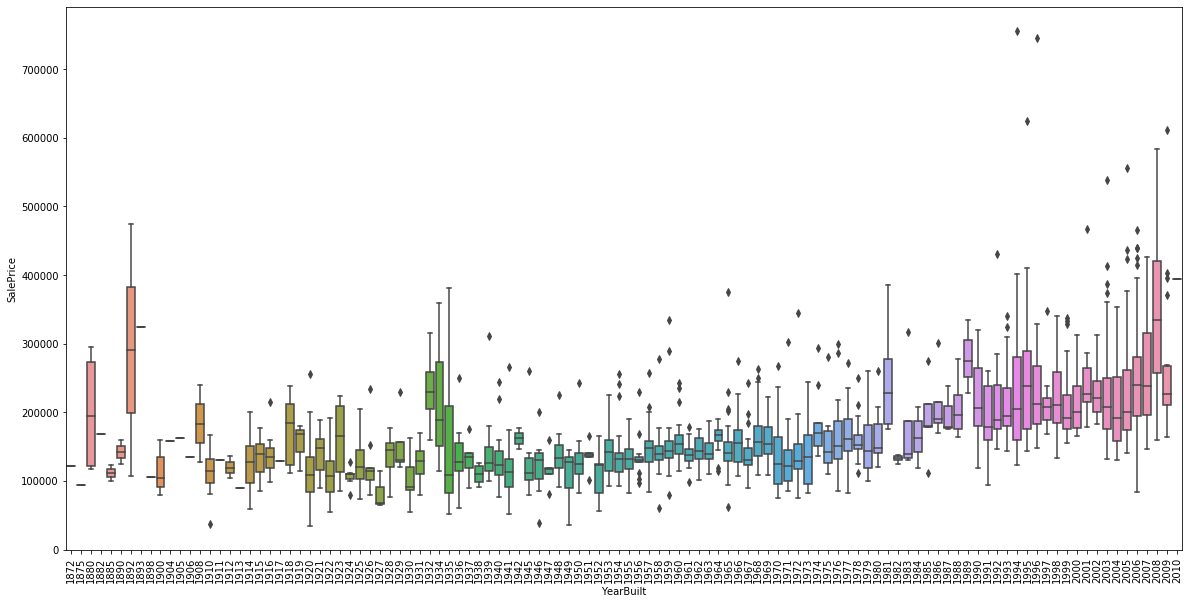

In [41]:
feat = 'YearBuilt'
plt.figure(figsize=(20,10))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))
plt.xticks(rotation=90)

# Outliers

Removing some major outliers:

In [42]:
train = train.drop(train[(train['SalePrice']<300000) & (train['GrLivArea']>4000)].index)

In [43]:
train = train.drop(train[(train['SalePrice']<300000) & (train['GarageArea']>1200)].index)

In [44]:
train = train.drop(train[(train['SalePrice']<300000) & (train['MasVnrArea']>1500)].index)

# Missing values

Missing values visualisation:


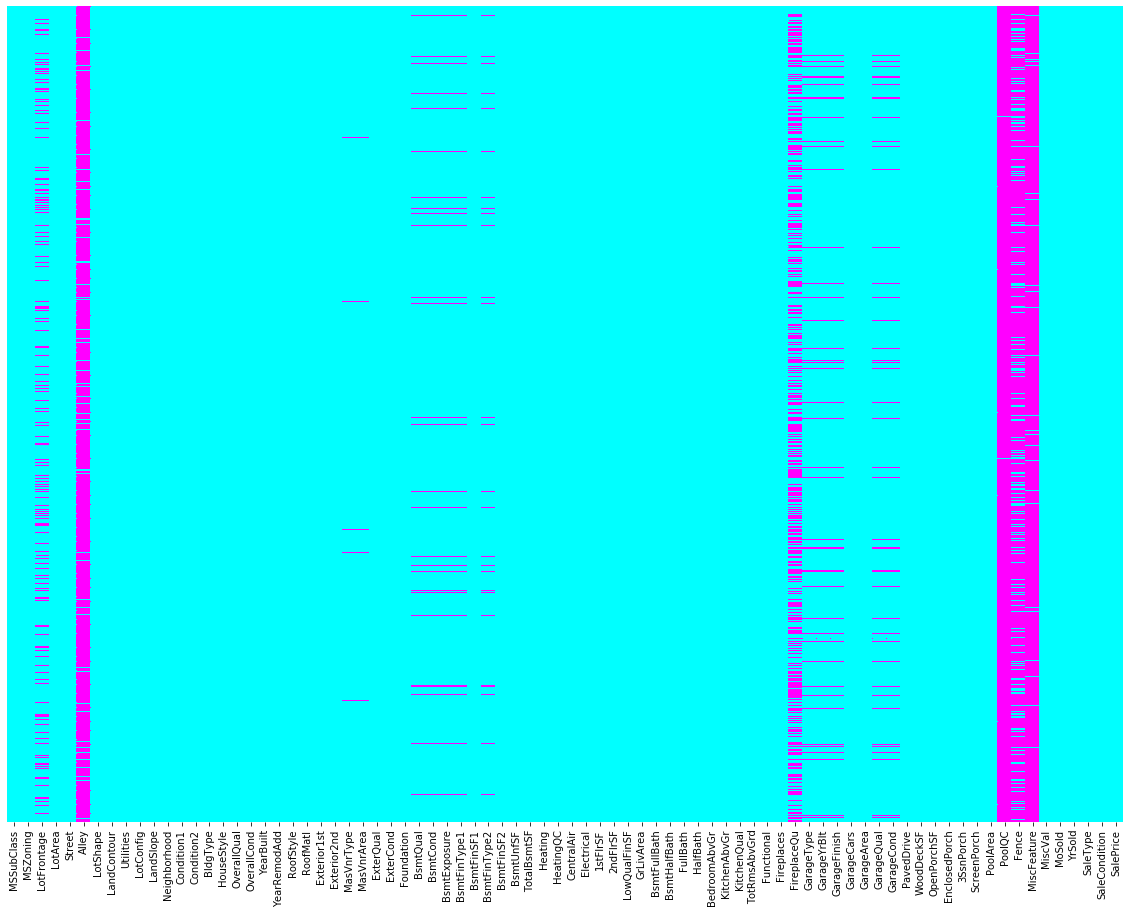

In [45]:
print('Missing values visualisation:')

plt.subplots(figsize=(20,15))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='cool')

In [46]:
pd.concat([train.isnull().sum().sort_values(ascending=False),
           train.isnull().sum().sort_values(ascending=False)*100/len(train)],
          axis=1,keys=('Number of missig values','Percentage of missing values')).head(20)

,Number of missig values,Percentage of missing values
PoolQC,1448,99.587345
MiscFeature,1401,96.354883
Alley,1364,93.810179
Fence,1173,80.674003
FireplaceQu,689,47.386520
LotFrontage,258,17.744154
GarageType,81,5.570839
GarageCond,81,5.570839
GarageFinish,81,5.570839
GarageQual,81,5.570839


Features *PoolQC*, *MiscFeature*, *Alley* have over 93% of missing values, but accoriding to the data description file NA in those cases actually mean that the feature is physically not occuring (should be *none* values instead of NA). However, due to the fact that occuring features would still make less than 7% of observations, those features will be removed.

In [47]:
train = train.drop(train[['PoolQC','MiscFeature','LotFrontage','Alley']], axis=1)

test = test.drop(test[['PoolQC','MiscFeature','LotFrontage','Alley']], axis=1)

The same logic applies to *PoolArea*, which even though hasn't any missing values, its almost all values are zeros simply due to lack of occuring pool.

In [48]:
train = train.drop(train[['PoolArea']], axis=1)

test = test.drop(test[['PoolArea']], axis=1)

Changing NA values in cases, where according to data description file NA actually means none (feature is physically not occuring):

In [49]:
train['Fence'] = train['Fence'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')

train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [50]:
for feat in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[feat] = train[feat].fillna('None')

In [51]:
for feat in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[feat] = test[feat].fillna('None')

As it can be seen in the plot above, features GarageYrBlt, GarageArea have missing values for the same rows as GarageType, GarageFinish, GarageQual, GarageCond, so it can be deduced that NA values are a result of non existing garage - therefore those NA values are replaced with 0.

In [52]:
for feat in ('GarageYrBlt', 'GarageArea'):
    train[feat] = train[feat].fillna(0)

In [53]:
for feat in ('GarageYrBlt', 'GarageArea'):
    test[feat] = test[feat].fillna(0)

Same reasoning as above applies to 'Basement' features.

In [54]:
for feat in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[feat] = train[feat].fillna('None')

In [55]:
for feat in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[feat] = test[feat].fillna('None')

In [56]:
pd.concat([train.isnull().sum().sort_values(ascending=False),
           train.isnull().sum().sort_values(ascending=False)*100/len(train)],
          axis=1,keys=('Number of missig values','Percentage of missing values')).head(4)

,Number of missig values,Percentage of missing values
MasVnrType,8,0.550206
MasVnrArea,8,0.550206
Electrical,1,0.068776
SalePrice,0,0.000000


Remaining missing values will be replaced with mean or mode for numerical and categorical variables respectively.

### Updating *num_feats* and *cat_feats*:

In [57]:
# dropping also SalePrice as test set doesn't contain this variable
num_feats = num_feats.drop(['PoolArea','LotFrontage','SalePrice'])

In [58]:
cat_feats = cat_feats.drop(['PoolQC','MiscFeature','Alley'])

### Missing values imputation:

In [59]:
for feat in num_feats:
    train[feat] = train[feat].fillna(train[feat].mean())

In [60]:
for feat in num_feats:
    test[feat] = test[feat].fillna(test[feat].mean())

In [61]:
for feat in cat_feats:
    train[feat] = train[feat].fillna(train[feat].mode()[0])

In [62]:
for feat in cat_feats:
    test[feat] = test[feat].fillna(train[feat].mode()[0])

Making sure there are no missing values left.

In [63]:
any(train.isnull().sum())

False

In [64]:
any(test.isnull().sum())

False

In [65]:
train.shape

(1454, 75)

In [66]:
test.shape

(1459, 74)

# Feature engineering and feature selection

Creating *TotalArea* variable representing total house area.

In [67]:
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalArea'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

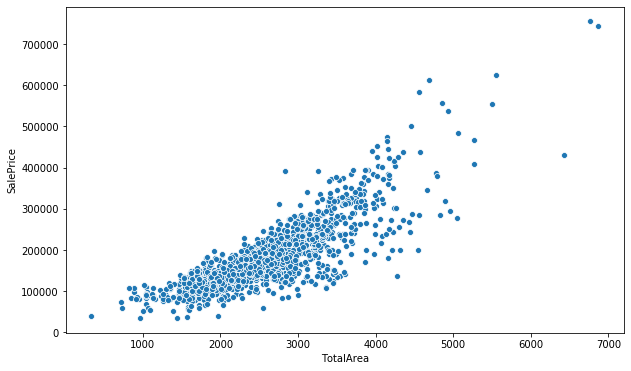

In [68]:
feat = 'TotalArea'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

As effective age of the house can be expressed as the year it was sold *YrSold* minus year when it was remoded *YearRemodAdd*, new feature *HouseAge* will be created and features *YearBuilt*, *YrSold* and *YearRemodAdd* will be removed. Also, *GarageYrBlt* will be removed as garage would most likely be remoded along with the rest of the house.

In [69]:
train['HouseAge'] = train['YrSold'] - train['YearRemodAdd']
test['HouseAge'] = test['YrSold'] - test['YearRemodAdd']

In [70]:
train = train.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt'],axis=1)
test = test.drop(['YearBuilt','YrSold','YearRemodAdd','GarageYrBlt'],axis=1)

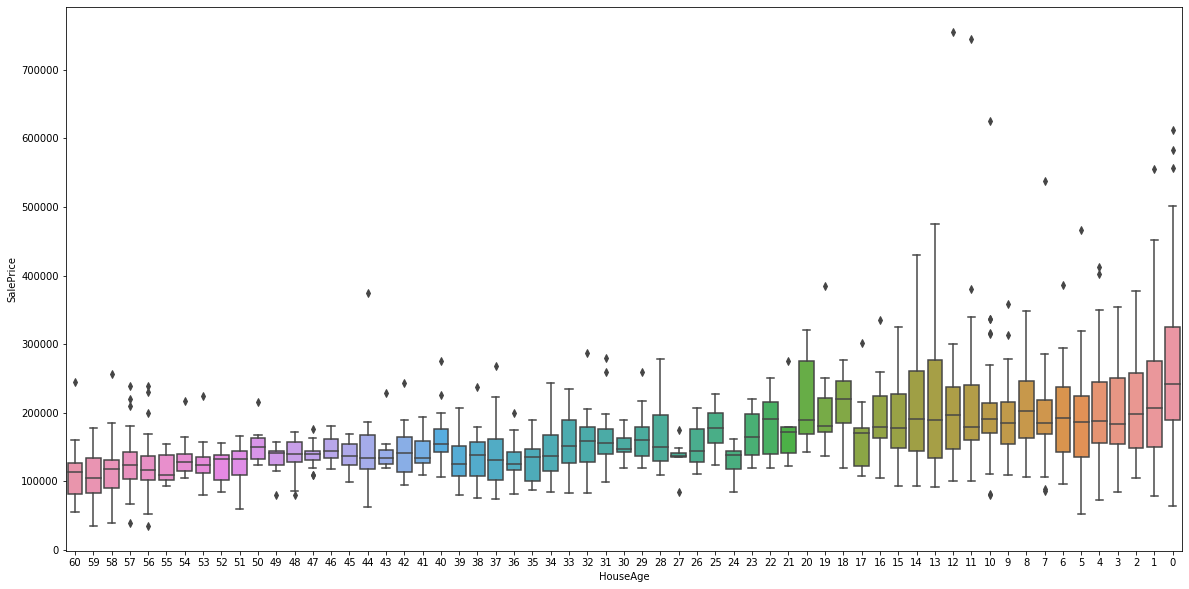

In [71]:
feat = 'HouseAge'
plt.figure(figsize=(20,10))
sns.boxplot(x=feat,y='SalePrice',
            data=pd.concat([train['SalePrice'],train[feat]],axis=1))
plt.gca().invert_xaxis()

Combining all 'Porch' variables representing available porch areas into one variable representing total available porch area.

In [72]:
train['PorchTot'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['PorchTot'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

In [73]:
train = train.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)
test = test.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1)

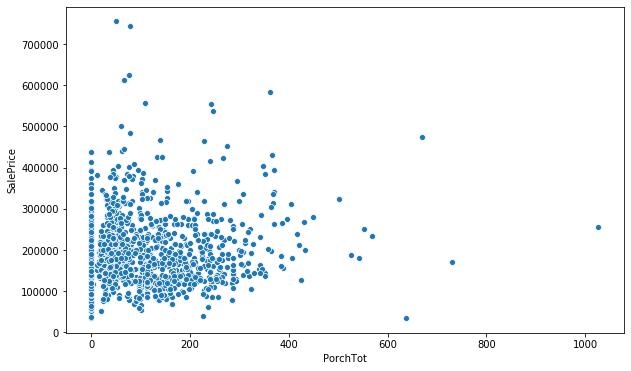

In [74]:
feat = 'PorchTot'
plt.figure(figsize=(10,6))
sns.scatterplot(x=feat,y='SalePrice',
                data=pd.concat([train['SalePrice'],train[feat]],axis=1))

Features, where one dominant value has over 97% occurance freqency will be removed.

In [75]:
for feat in train.columns:
    for i in np.array(train[feat].value_counts()/len(train)):
        if i > 0.97:
            print(feat)
            print(train[feat].value_counts()/len(train))
            print('\n')
            break

Street
Pave    0.996561
Grvl    0.003439
Name: Street, dtype: float64


Utilities
AllPub    0.999312
NoSeWa    0.000688
Name: Utilities, dtype: float64


Condition2
Norm      0.990371
Feedr     0.004127
RRNn      0.001376
Artery    0.001376
PosA      0.000688
RRAn      0.000688
PosN      0.000688
RRAe      0.000688
Name: Condition2, dtype: float64


RoofMatl
CompShg    0.982806
Tar&Grv    0.007565
WdShngl    0.004127
WdShake    0.003439
Roll       0.000688
Metal      0.000688
Membran    0.000688
Name: RoofMatl, dtype: float64


Heating
GasA     0.977992
GasW     0.012380
Grav     0.004814
Wall     0.002751
OthW     0.001376
Floor    0.000688
Name: Heating, dtype: float64


LowQualFinSF
0      0.982118
80     0.002063
360    0.001376
528    0.000688
53     0.000688
120    0.000688
144    0.000688
156    0.000688
205    0.000688
232    0.000688
234    0.000688
371    0.000688
572    0.000688
390    0.000688
392    0.000688
397    0.000688
420    0.000688
473    0.000688
479    0.000688
4

In [76]:
train = train.drop(train[['Street','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF']],axis=1)
test = test.drop(test[['Street','Utilities','Condition2','RoofMatl','Heating','LowQualFinSF']],axis=1)

### Updating *num_feats* and *cat_feats*:

In [77]:
num_feats = num_feats.append(pd.Index(['TotalArea','PorchTot'])).drop(
    ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','LowQualFinSF']
)

In [78]:
cat_feats = cat_feats.append(pd.Index(['HouseAge'])).drop(
    ['YearBuilt','YrSold','YearRemodAdd','Street','Utilities','Condition2','RoofMatl','Heating','GarageYrBlt']
)

# Skewness

### Target variable

Perfoming *log(1+x)* transformation on target variable:

In [79]:
y_train = np.log1p(train['SalePrice'])

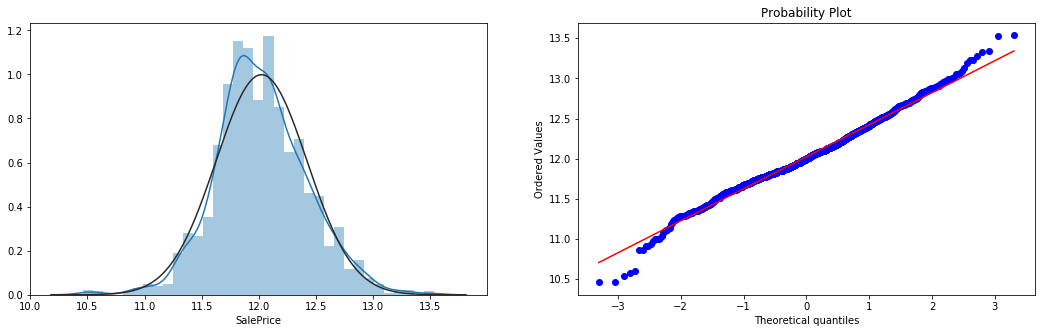

Skewness: 0.1251625796932984
Kurtosis: 0.8128307268373107


count    1454.000000
mean       12.023971
std         0.399552
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64


In [80]:
from scipy import stats

f,ax = plt.subplots(1,2,figsize=(18,5))
sns.distplot(y_train,fit=norm,ax=ax[0])
stats.probplot(y_train,plot=plt)
plt.show()

print("Skewness: {}".format(y_train.skew()))
print("Kurtosis: {}".format(y_train.kurt()))
print('\n')
print(y_train.describe())

### Rest of the features

Transforming skewed features with Box Cox transformation.

In [81]:
train[num_feats].skew().sort_values(ascending=False)

MiscVal        24.455241
LotArea        12.629057
BsmtFinSF2      4.245246
MasVnrArea      2.488224
PorchTot        2.012684
WoodDeckSF      1.546002
GrLivArea       1.015000
BsmtUnfSF       0.912178
1stFlrSF        0.888449
2ndFlrSF        0.812202
TotalArea       0.806703
BsmtFinSF1      0.766169
TotalBsmtSF     0.509565
GarageArea      0.018978
dtype: float64

Only features with skewness modulus greater than 0.7 will be transformed with Box Cox transformation:

In [82]:
skewness = pd.DataFrame(train[num_feats].skew().sort_values(ascending=False),columns=['skewness'])

In [83]:
skewed_transform = skewness[(skewness['skewness']>0.7) | (skewness['skewness']<(-0.7))]
skewed_transform

,skewness
MiscVal,24.455241
LotArea,12.629057
BsmtFinSF2,4.245246
MasVnrArea,2.488224
PorchTot,2.012684
WoodDeckSF,1.546002
GrLivArea,1.015000
BsmtUnfSF,0.912178
1stFlrSF,0.888449
2ndFlrSF,0.812202


In [84]:
from scipy.special import boxcox1p

In [85]:
train[skewed_transform.index] = boxcox1p(train[skewed_transform.index],0.2)

In [86]:
test[skewed_transform.index] = boxcox1p(test[skewed_transform.index],0.2)

# Categorical features encoding

For this purpose, train and set set will be temporarily merged into *df* data frame.

In [87]:
df = pd.concat((train.drop(['SalePrice'],axis=1), test)).reset_index(drop=True) 

In [88]:
df.shape

(2913, 63)

### Ordinal encoding

In [89]:
df['ExterQual'] = df['ExterQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df['ExterQual'] = df['ExterQual'].astype(int)

df['ExterCond'] = df['ExterCond'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df['ExterCond'] = df['ExterCond'].astype(int)

df['BsmtCond'] = df['BsmtCond'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])
df['BsmtCond'] = df['BsmtCond'].astype(int)

df['BsmtQual'] = df['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])
df['BsmtQual'] = df['BsmtQual'].astype(int)

df['BsmtExposure'] = df['BsmtExposure'].replace(['Gd','Av','Mn','No','None'],[4,3,2,1,0])
df['BsmtExposure'] = df['BsmtExposure'].astype(int)

df['BsmtFinType1'] = df['BsmtFinType1'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],[6,5,4,3,2,1,0])
df['BsmtFinType1'] = df['BsmtFinType1'].astype(int)

df['BsmtFinType2'] = df['BsmtFinType2'].replace(['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'],[6,5,4,3,2,1,0])
df['BsmtFinType2'] = df['BsmtFinType2'].astype(int)

df['HeatingQC'] = df['HeatingQC'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df['HeatingQC'] = df['HeatingQC'].astype(int)

df['KitchenQual'] = df['KitchenQual'].replace(['Ex','Gd','TA','Fa','Po'],[5,4,3,2,1])
df['KitchenQual'] = df['KitchenQual'].astype(int)

df['FireplaceQu'] = df['FireplaceQu'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])
df['FireplaceQu'] = df['FireplaceQu'].astype(int)

df['GarageFinish'] = df['GarageFinish'].replace(['Fin','RFn','Unf','None'],[3,2,1,0])
df['GarageFinish'] = df['GarageFinish'].astype(int)

df['GarageCond'] = df['GarageCond'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])
df['GarageCond'] = df['GarageCond'].astype(int)

df['GarageQual'] = df['GarageQual'].replace(['Ex','Gd','TA','Fa','Po','None'],[5,4,3,2,1,0])
df['GarageQual'] = df['GarageQual'].astype(int)

df['PavedDrive'] = df['PavedDrive'].replace(['Y','P','N'],[3,2,1])
df['PavedDrive'] = df['PavedDrive'].astype(int)

df['Functional'] = df['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],[7,6,5,4,3,2,1,0])
df['Functional'] = df['Functional'].astype(int)

### One-hot encoding

Making sure that every feature has congruent data type:

In [90]:
# checking numerical features
pd.set_option('display.max_columns', 100)
pd.DataFrame(df[num_feats].dtypes).T

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,MiscVal,TotalArea,PorchTot
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [91]:
# checking categorical features
pd.set_option('display.max_columns', 100)
pd.DataFrame(df[cat_feats].dtypes).T

,MSSubClass,OverallQual,OverallCond,MoSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,KitchenAbvGr,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,HouseAge
0,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,int64,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,object,int64,int64,int64,int64,int64,int64,object,object,int64,int64,int64,object,int64,int64,int64,int64,object,object,object,int64


Changing *MSSubClass* and *MoSold* data type:

In [92]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [93]:
df = pd.get_dummies(df,drop_first=True)

In [94]:
any(df.dtypes == object)

False

In [95]:
train = df[:train.shape[0]]
test = df[train.shape[0]:]

In [96]:
train.shape

(1454, 196)

In [97]:
test.shape

(1459, 196)

# Models

In [98]:
X_train = train.values
y_train = y_train.values

X_test = test.values
y_test = target['SalePrice'].values

In [99]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from mlxtend.regressor import StackingCVRegressor

In [100]:
kfold= KFold(n_splits=10,random_state=42,shuffle=True)

def rmse(y, y_pred):
    return (mean_squared_error(y, y_pred))**0.5

# Assigning scoring paramter to 'neg_mean_squared_error' beacause 'mean_squared_error' is not 
# available inside cross_val_score method
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

### Lasso

In [178]:
alpha_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alpha_lasso, cv=kfold))

score = cv_rmse(lasso)
print(f"RMSE: {round(score.mean(),4)} ({round(score.std(),4)})")

RMSE: 0.1118 (0.0174)


## Ridge

In [184]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alpha_ridge, cv=kfold))

score = cv_rmse(ridge)

print(score)
print(f"RMSE: {round(score.mean(),4)} ({round(score.std(),4)})")

[0.08965823 0.12727174 0.10766006 0.15010861 0.12384688 0.10739597
 0.10346109 0.10533247 0.1083241  0.0966107 ]
RMSE: 0.112 (0.0165)


## ElasticNet

In [193]:
alpha_enet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 000.8, 0.001, 0.002, 0.003, 0.01]
l1ratio_enet = [0.8, 0.85, 0.9, 0.95, 0.97, 1]


enet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_enet, \
                                                        cv=kfold, l1_ratio=l1ratio_enet))

score = cv_rmse(elasticnet)
print(score)
print(f"RMSE: {round(score.mean(),4)} ({round(score.std(),4)})")

[0.08952255 0.1274556  0.10763877 0.15254229 0.12312597 0.11190211
 0.10268224 0.10098938 0.10687515 0.09588184]
RMSE: 0.1119 (0.0174)


### XGBoost

In [207]:
n_estimators = [100,500,900,1200,1500]
max_depth = [3,5,10,15]
learning_rate = [0.01, 0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
boosters = ['gbtree','gblinear']
base_score = [0.25,0.5,0.75,1]

hyperparameter_grid = {'n_estimators':n_estimators,
                       'max_depth':max_depth,
                       'learning_rate':learning_rate,
                       'min_child_weight':min_child_weight,
                       'booster':boosters,
                       'base_score':base_score}

xgb_model = xgb.XGBRegressor()

In [208]:
random_cv = RandomizedSearchCV(estimator=xgb_model,
                              param_distributions=hyperparameter_grid,
                              cv=kfold,n_iter=50,
                              scoring='neg_mean_absolute_error',n_jobs=4,
                              verbose=5,
                              return_train_score=True,
                              random_state=42)

random_cv.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed: 23.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 47.0min
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed: 50.8min finished


[21:23:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          ob...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
  

In [209]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [216]:
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [217]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [218]:
score = cv_rmse(xgb)
print(score)
print(f"RMSE: {round(score.mean(),4)} ({round(score.std(),4)})")

[0.09595593 0.1361448  0.11604104 0.15092574 0.13916099 0.11291001
 0.10347652 0.1115648  0.10774749 0.09677995]
RMSE: 0.1171 (0.0178)


# Stacked regression

In [221]:
stack_reg = StackingCVRegressor(regressors=(ridge, lasso, enet, xgb),
                                meta_regressor=xgb,
                                cv=kfold,
                                use_features_in_secondary=True)

score = cv_rmse(stack_reg)
print(score)
print(f"RMSE: {round(score.mean(),4)} ({round(score.std(),4)})")

[0.09923888 0.1369029  0.10310029 0.15241094 0.12653912 0.11911491
 0.11227159 0.10562527 0.10781462 0.1077708 ]
RMSE: 0.1171 (0.016)


# Weighted average ensemble model

In [226]:
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
enet.fit(X_train,y_train)
xgb.fit(X_train,y_train)
stack_reg.fit(X_train,y_train)

StackingCVRegressor(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                    meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                importance_type='gain',
                                                learning_rate=0.05,
                                                max_delta_step=0, max_depth=3,
                                                min_child_weight=4,
                                                missing=None, n_estimators=900,
                                                n_jobs=1, nthread=None,
                                                objective='...
                                             importance_type='gain',
           

In [227]:
def weighted_average_ensemble(X_train):
    return(0.2037*lasso.predict(X_train) + \
          0.2035*ridge.predict(X_train) + \
          0.2036*enet.predict(X_train) + \
          0.1946*xgb.predict(X_train) + \
          0.1946*stack_reg.predict(X_train))

In [229]:
print('RMSLE score on train data:')
weighted_average_ensemble_score=rmsle(y_train, weighted_average_ensemble(X_train))
print(wa_score)

RMSLE score on train data:
0.07660504030638048


In [234]:
predictions = (0.2037*np.expm1(lasso.predict(X_test)) + \
               0.2035*np.expm1(ridge.predict(X_test)) + \
               0.2036*np.expm1(enet.predict(X_test)) + \
               0.1946*np.expm1(xgb.predict(X_test)) + \
               0.1946*np.expm1(stack_reg.predict(X_test))
                )

In [242]:
# plt.figure(figsize=(12,6))
# plt.scatter(y_test,predictions)
# plt.plot(y_test,y_test,'r') # perfect prediction

In [238]:
pd.concat([pd.DataFrame(predictions,columns=['predictions']),pd.DataFrame(y_test,columns=['targets'])],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458
predictions,118017.948555,162906.706455,185746.676433,195545.299107,191880.520915,169611.950019,172813.453642,163708.059636,190320.034582,121958.673291,193606.031557,97345.541927,93499.147757,146265.927855,112742.686124,364309.972465,254048.488767,287196.189814,276620.252690,518067.390515,333997.044782,214520.890664,176876.893117,165669.546529,190436.440535,196000.560116,330448.931410,226693.105894,197156.428507,231636.324758,194162.198259,91785.982545,183304.217758,296976.330539,290021.361855,236079.662528,177072.346727,170296.018426,162564.390892,157672.902154,177473.485111,149042.992472,294359.846509,241343.489876,228338.128107,194326.382209,253765.150965,199886.075330,161656.140288,145253.436902,...,130335.806067,83943.313681,50953.696575,100290.084272,134202.282090,120277.869958,161968.179112,149596.003343,167528.979816,141520.256497,100454.677866,155158.145365,174834.323374,203215.110590,193750.114312,187688.919891,230488.346897,90520.306447,140596.261189,54838.556118,75913.178144,134774.903322,47672.196259,76960.725252,59271.349839,330492.549985,283576.974478,205327.572287,154023.331681,209456.020406,159224.147592,204547.584649,178810.482647,324729.157052,348314.266093,87665.862748,200470.489952,111215.144195,129071.381546,150367.329763,80285.033900,79345.357684,145121.418684,80580.786622,75745.539319,85086.579006,81677.172178,169633.812142,114305.809847,220205.484823
targets,169277.052498,187758.393989,183583.683570,179317.477511,150730.079977,177150.989247,172070.659229,175110.956520,162011.698832,160726.247831,157933.279456,145291.245020,159672.017632,164167.518302,150891.638244,179460.965187,185034.628914,182352.192645,183053.458214,187823.339254,186544.114328,158230.775205,190552.829321,147183.674872,185855.300905,174350.470677,201740.620691,162986.378896,162330.199086,165845.938617,180929.622877,163481.501520,187798.076714,198822.198943,194868.409900,152605.298564,147797.702837,150521.968993,146991.630154,150306.307815,151164.372535,151133.706961,156214.042541,171992.760735,173214.912550,192429.187346,190878.695085,194542.544136,191849.439073,176363.773908,...,199202.898961,182818.156667,148217.262541,188997.797082,185807.928878,177030.477842,175942.474594,172912.518576,198359.248865,184379.133036,194255.566949,209449.651603,169979.323958,188206.281859,186412.438609,196761.386410,208353.269558,166548.067241,175942.474594,166790.457916,160515.850579,192167.621096,178751.551083,198678.894117,164553.120272,156887.932862,164185.777306,212992.120631,197468.550533,180106.843740,183972.071057,245283.198338,170351.963411,195596.307707,189369.756330,223667.404552,169335.310624,167411.028352,187709.555004,196526.002999,137402.569856,165086.775062,188506.431412,172917.456816,166274.325226,167081.220949,164788.778231,219222.423400,184924.279659,187741.866657


Saving predictions to csv:

In [236]:
pred = pd.DataFrame(predictions)
final = pd.concat([target['Id'],pred],axis=1)
final.columns = ['Id','SalePrice']
final.to_csv('sub.csv',index=False)